In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
stop_words = stopwords.words("english")
lem =WordNetLemmatizer()

In [4]:
df = pd.read_csv("train.tsv",sep="\t")

In [5]:
df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


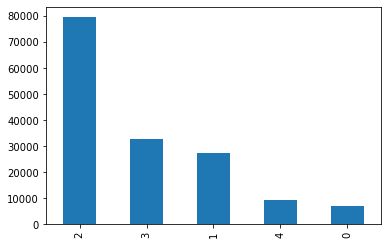

In [6]:
df["Sentiment"].value_counts().plot.bar()

In [7]:
df["Sentiment"].replace(0,value="negative",inplace=True)
df["Sentiment"].replace(1,value="negative",inplace=True)

df["Sentiment"].replace(3,value="positive",inplace=True)
df["Sentiment"].replace(4,value="positive",inplace=True)

In [8]:
df = df[df["Sentiment"]!=2].sample(36000)

In [9]:
#data["label"].value_counts()

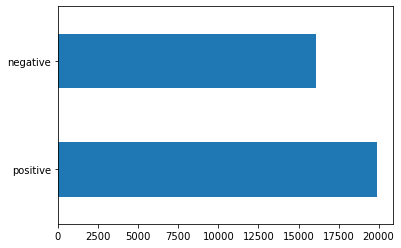

In [10]:
df["Sentiment"].value_counts().plot.barh()

In [11]:
data= pd.DataFrame()
data["sentences"] = df["Phrase"]
data["label"] = df["Sentiment"]

In [12]:
rare_words = pd.Series(" ".join(data["sentences"]).split()).value_counts()[-1000:]
rare_words

promotes       1
pro-Serb       1
teendom        1
Grabowsky      1
spinoff        1
              ..
sisterhood     1
peaked         1
Teacher        1
deliriously    1
wallowing      1
Length: 1000, dtype: int64

In [13]:
data["sentences"] = data["sentences"].apply(lambda x : " ".join(x for x in x.split() if x not in rare_words))

In [14]:
data["sentences"]

49537                          the best silly horror movies
65509                                               restate
58716                                  smart and newfangled
44598     is hugely overwritten , with tons and tons of ...
43933                                             about ten
                                ...                        
73254     remarkable procession of sweeping pictures tha...
107693     Somewhere inside the mess that is World Traveler
109360                                   be liked sometimes
139649    An entertaining mix of period drama and flat-o...
118587    a technological exercise that lacks juice and ...
Name: sentences, Length: 36000, dtype: object

# Text PreProcessing

In [15]:
stop_words = stopwords.words("english")
lem =WordNetLemmatizer()

def cleaning(data):
    # tokenize
    text_tokens = word_tokenize(data.lower())
    # Remove puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    # removing stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    #lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    # joining
    return " ".join(text_cleaned)

In [16]:
data["sentences2"] = data["sentences"].apply(cleaning)

In [17]:
data["sentences2"]

49537                               best silly horror movie
65509                                               restate
58716                                      smart newfangled
44598       hugely overwritten ton ton dialogue given child
43933                                                   ten
                                ...                        
73254     remarkable procession sweeping picture reinvig...
107693                 somewhere inside mess world traveler
109360                                      liked sometimes
139649    entertaining mix period drama farce please his...
118587            technological exercise lack juice delight
Name: sentences2, Length: 36000, dtype: object

# Feature Engineering

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data["sentences2"],data["label"], test_size=0.25, random_state=101)

In [19]:
y_train = y_train.map({"negative":0 ,"positive":1})

y_test=y_test.map({"negative":0 ,"positive":1})

In [20]:
y_train

151379    1
123551    0
11380     1
149904    0
28247     0
         ..
55906     1
22283     0
115439    0
126348    1
145976    0
Name: label, Length: 27000, dtype: int64

# Count Vectors

In [21]:
vectorizer = CountVectorizer()

vectorizer.fit(X_train)

CountVectorizer()

In [22]:
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [23]:
vectorizer.get_feature_names()

['aaa',
 'aaliyah',
 'abagnale',
 'abandon',
 'abandoned',
 'abbass',
 'abbott',
 'abc',
 'abdul',
 'abhorrent',
 'abhors',
 'abiding',
 'ability',
 'abject',
 'able',
 'ably',
 'abomination',
 'aboriginal',
 'aborted',
 'abound',
 'abrasive',
 'abridged',
 'abroad',
 'abrupt',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed',
 'absorbing',
 'absorbs',
 'abstract',
 'absurd',
 'absurdist',
 'absurdity',
 'absurdly',
 'abundant',
 'abuse',
 'abysmal',
 'abyss',
 'academic',
 'academy',
 'accent',
 'accentuating',
 'accept',
 'acceptable',
 'accepting',
 'accepts',
 'access',
 'accessibility',
 'accessible',
 'accident',
 'accidental',
 'acclaim',
 'acclaimed',
 'accommodate',
 'accompanies',
 'accompanying',
 'accomplish',
 'accomplished',
 'accomplishes',
 'accomplishment',
 'according',
 'account',
 'accountant',
 'accumulate',
 'accumulated',
 'accumulates',
 'accuracy',
 'accurate',
 'accurately',
 'accuse',
 'accused',
 'ace',
 'acerbic',
 'ache',
 'achieve

In [24]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
a=pd.DataFrame(X_train_count.toarray(),columns=vectorizer.get_feature_names())

In [26]:
a

,aaa,aaliyah,abagnale,abandon,abandoned,abbass,abbott,abc,abdul,abhorrent,...,zipper,zippy,zishe,ziyi,zoe,zombie,zone,zoning,zoolander,zwick
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF idf 

In [27]:
tf_idf = TfidfVectorizer()
tf_idf.fit(X_train)

TfidfVectorizer()

In [28]:
X_train_tf_idf = tf_idf.transform(X_train)
X_test_tf_idf = tf_idf.transform(X_test)

In [29]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
b = pd.DataFrame(X_train_tf_idf.toarray(),columns=vectorizer.get_feature_names())

In [31]:
b

,aaa,aaliyah,abagnale,abandon,abandoned,abbass,abbott,abc,abdul,abhorrent,...,zipper,zippy,zishe,ziyi,zoe,zombie,zone,zoning,zoolander,zwick
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# MODEL & Prediction

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [33]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [34]:
nb.fit(X_train_tf_idf,y_train)

MultinomialNB()

In [35]:
y_pred=nb.predict(X_test_count)

In [36]:
aa = nb.predict(X_test_count) - y_test
aa[aa==0].value_counts()

0    7576
Name: label, dtype: int64

In [37]:
y_test.value_counts()

1    5008
0    3992
Name: label, dtype: int64

In [38]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[3113  879]
 [ 545 4463]]


              precision    recall  f1-score   support

           0       0.85      0.78      0.81      3992
           1       0.84      0.89      0.86      5008

    accuracy                           0.84      9000
   macro avg       0.84      0.84      0.84      9000
weighted avg       0.84      0.84      0.84      9000



**Multinomial DB wit TFidf**

In [39]:
nb.fit(X_train_tf_idf,y_train)

MultinomialNB()

In [40]:
y_pred_tfidf = nb.predict(X_test_tf_idf)

In [41]:
print(confusion_matrix(y_test,y_pred_tfidf))
print('\n')
print(classification_report(y_test,y_pred_tfidf))

[[3105  887]
 [ 504 4504]]


              precision    recall  f1-score   support

           0       0.86      0.78      0.82      3992
           1       0.84      0.90      0.87      5008

    accuracy                           0.85      9000
   macro avg       0.85      0.84      0.84      9000
weighted avg       0.85      0.85      0.84      9000



**XGBoost Classifier**

In [42]:
from xgboost import XGBClassifier

xgb_model = xgb_model =  XGBClassifier(n_estimators = 1000,  learning_rate = 0.25, max_depth= None, subsample =0.6)
xgb_model.fit(X_train_count, y_train,
             early_stopping_rounds=10,
             eval_set=[(X_test_count, y_test)],
             verbose=True)

y_pred = xgb_model.predict(X_test_count)

[0]	validation_0-error:0.42800
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.40811
[2]	validation_0-error:0.40744
[3]	validation_0-error:0.40111
[4]	validation_0-error:0.40089
[5]	validation_0-error:0.39578
[6]	validation_0-error:0.39200
[7]	validation_0-error:0.38922
[8]	validation_0-error:0.38689
[9]	validation_0-error:0.38433
[10]	validation_0-error:0.37811
[11]	validation_0-error:0.37644
[12]	validation_0-error:0.37311
[13]	validation_0-error:0.37156
[14]	validation_0-error:0.37000
[15]	validation_0-error:0.36767
[16]	validation_0-error:0.36656
[17]	validation_0-error:0.36367
[18]	validation_0-error:0.36044
[19]	validation_0-error:0.35556
[20]	validation_0-error:0.35144
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35011
[23]	validation_0-error:0.34778
[24]	validation_0-error:0.34633
[25]	validation_0-error:0.34467
[26]	validation_0-error:0.34311
[27]	validation_0-error:0.34156
[28]	validation_0-error:0.33844
[29]	validation_

In [43]:
aa = y_pred - y_test
aa[aa==0].value_counts()

0    6766
Name: label, dtype: int64

In [44]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[2230 1762]
 [ 472 4536]]


              precision    recall  f1-score   support

           0       0.83      0.56      0.67      3992
           1       0.72      0.91      0.80      5008

    accuracy                           0.75      9000
   macro avg       0.77      0.73      0.73      9000
weighted avg       0.77      0.75      0.74      9000



**GridSearch**

In [45]:
xgb =  XGBClassifier()

In [ ]:
xgb_params = {"n_estimators": [50, 100, 300],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 3, 
                            n_jobs = -1, verbose = 2).fit(X_train_count, y_train,
             early_stopping_rounds=10,
             eval_set=[(X_test_count, y_test)],
             verbose=True)

xgb_cv_model.best_params_

**Model Evaluation**

### LOGİSTİC REGRESSİON

In [47]:
from sklearn.linear_model import LogisticRegression

In [50]:
clf = LogisticRegression(random_state=0).fit(X_train_count, y_train)

C:\Users\mkdty\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
y_pred = clf.predict(X_test_count)

In [53]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[3168  824]
 [ 559 4449]]


              precision    recall  f1-score   support

           0       0.85      0.79      0.82      3992
           1       0.84      0.89      0.87      5008

    accuracy                           0.85      9000
   macro avg       0.85      0.84      0.84      9000
weighted avg       0.85      0.85      0.85      9000

